# Lesson7-1 Gradients and Color Spaces

## Sobel Operator

### Description
The Sobel operator is at the heart of the Canny edge detection algorithm you used in the Introductory Lesson. Applying the Sobel operator to an image is a way of taking the derivative of the image in the xx or yy direction.
The operators for **Sobel_x** and **Sobel_y** respectively, look like this:

**Sobel_x** : \begin{pmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix}
**Sobel_y** : \begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{pmatrix}
**(Note : x-direction is rightside [→], y-direction is upperside [↑])**

When look the first row of the Soble_x-direction operator, this is simillar with **Discrete Differentiation, x-direction**  

$$ [-1, 0, 1] → \{f(x + 1 , y) - f(x, y)\} + \{f(x , y) - f(x - 1, y)\}    $$

$$ = f(x + 1 , y) - f(x - 1, y) $$

Therefore, by convoluting sobel operator, we can get gradients of the color.   
Its magnitude means **How much color is changed**,   
and Its direction(sign of gradient) means **Which direction color is changed toward**

### Gradient Thresholding

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

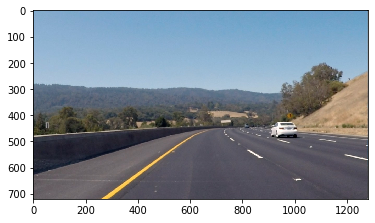

In [3]:
img = plt.imread('LectureImages/curved-lane.jpg')
plt.imshow(img)

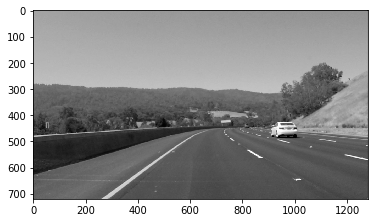

In [4]:
#Gray scale the image
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap = 'gray')

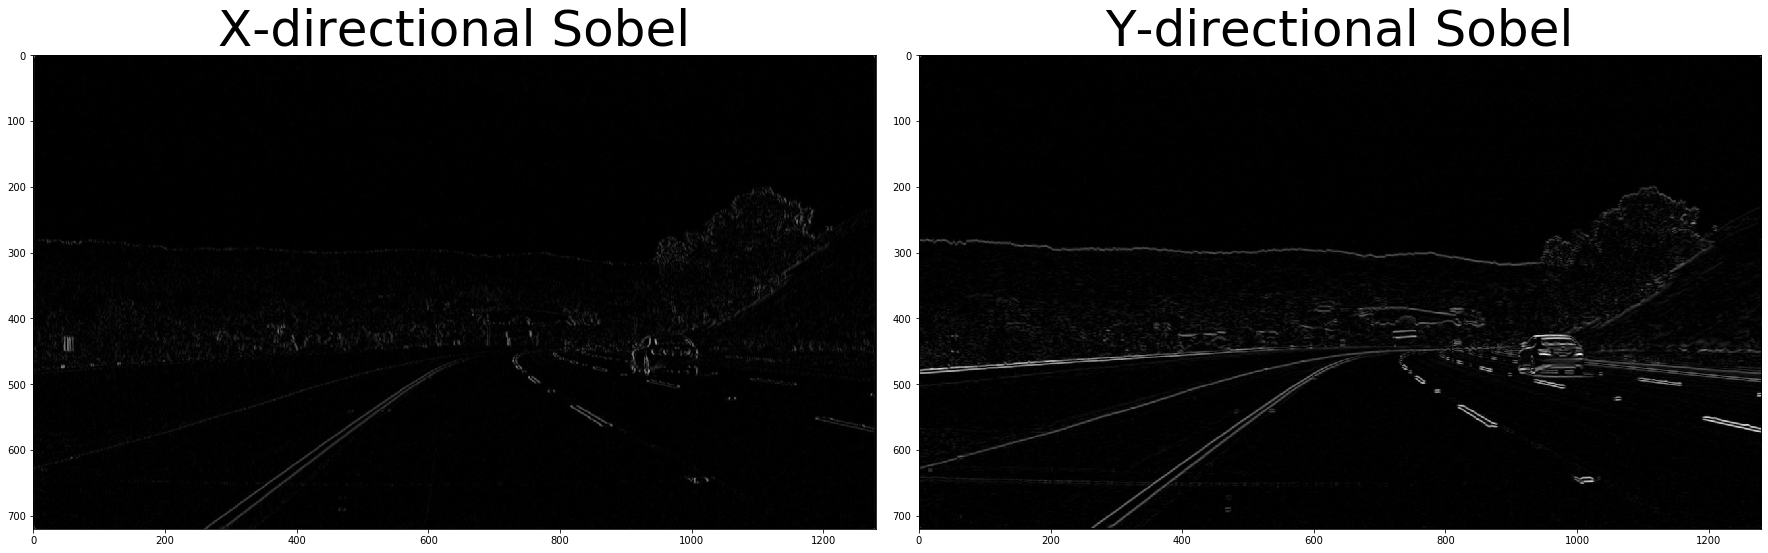

In [12]:
# Apply sobel operator, cv2.Sobel
img_sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0)   # 1, 0 means x direction
img_sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1)   # 0, 1 means y direction

# Get absolute value of img_sobel to get only magnitude of gradient
img_sobelx_abs = np.absolute(img_sobelx)
img_sobely_abs = np.absolute(img_sobely)

"""
Note: It's not entirely necessary to convert to 8-bit (range from 0 to 255)
but in practice, it can be useful in the event that you've written a function to apply a particular threshold,
and you want it to work the same on input images of different scales, like jpg vs. png.
You could just as well choose a different standard range of values, like 0 to 1 etc.
"""
img_sobelx_scaled = np.uint8(img_sobelx_abs / np.max(img_sobelx_abs) * 255)
img_sobely_scaled = np.uint8(img_sobely_abs / np.max(img_sobelx_abs) * 255)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_sobelx_scaled, cmap='gray')
ax1.set_title('X-directional Sobel', fontsize=50)
ax2.imshow(img_sobely_scaled, cmap='gray')
ax2.set_title('Y-directional Sobel', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

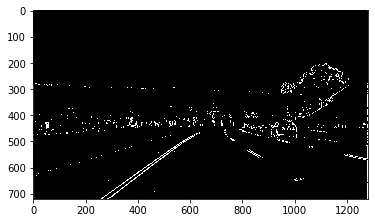

In [6]:
# Create a binary threshold to select pixels based on gradient magnitude
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(img_sobelx_scaled)
sxbinary[(img_sobelx_scaled >= thresh_min) & (img_sobelx_scaled <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

### Magnitude of Gradient

$$ \left\vert\nabla{f}\right\vert = \sqrt{{\partial f\over\partial x}^2 + {\partial f\over\partial y}^2} $$

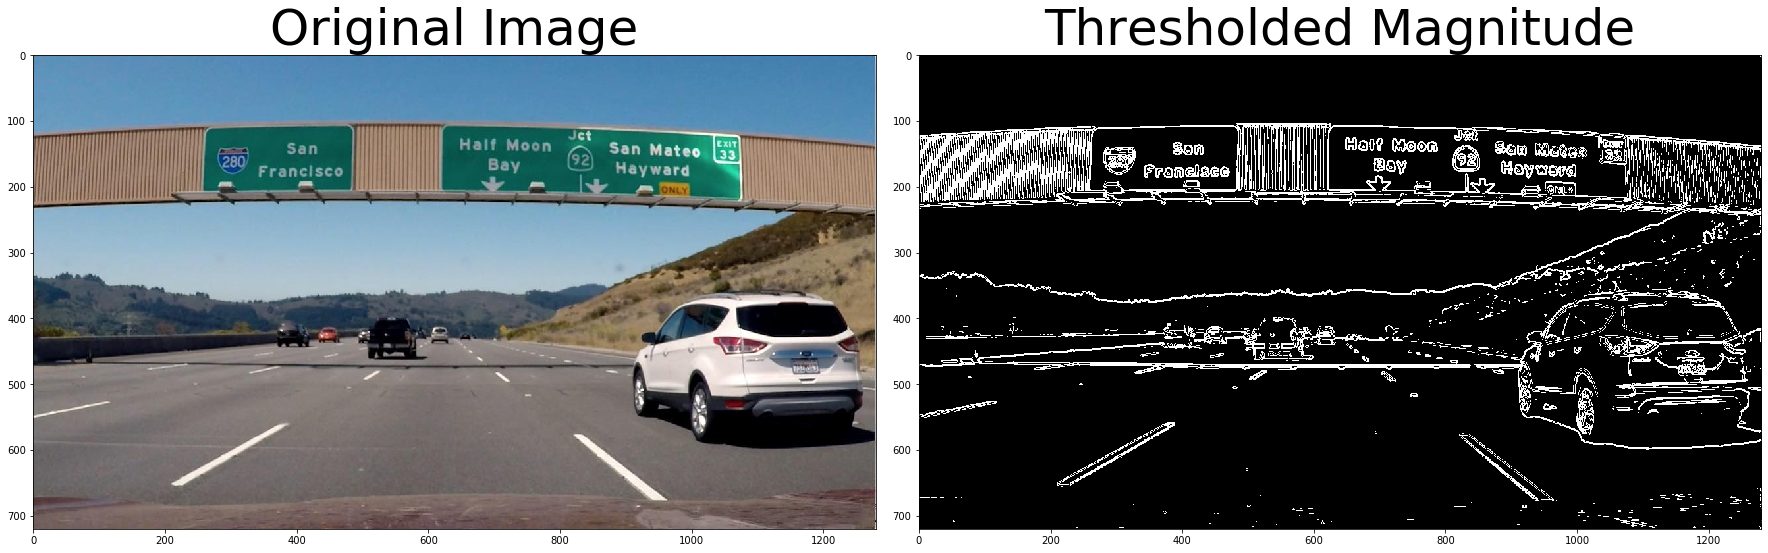

In [29]:
# Read in an image
image = mpimg.imread('LectureImages/signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY )
    # 2) Take the gradient in x and y separately
    img_sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    img_sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    # 3) Calculate the magnitude 
    img_sobel = np.sqrt(np.square(img_sobelx) + np.square(img_sobely))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    img_sobel_scaled = np.uint8(img_sobel / np.max(img_sobel) * 255)
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(img_sobel_scaled)
    binary_output[(img_sobel_scaled >= mag_thresh[0]) & (img_sobel_scaled <= mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Direction of Gradient

$$ \arctan{\frac{\partial f\over\partial y}{\partial f\over\partial y}} $$

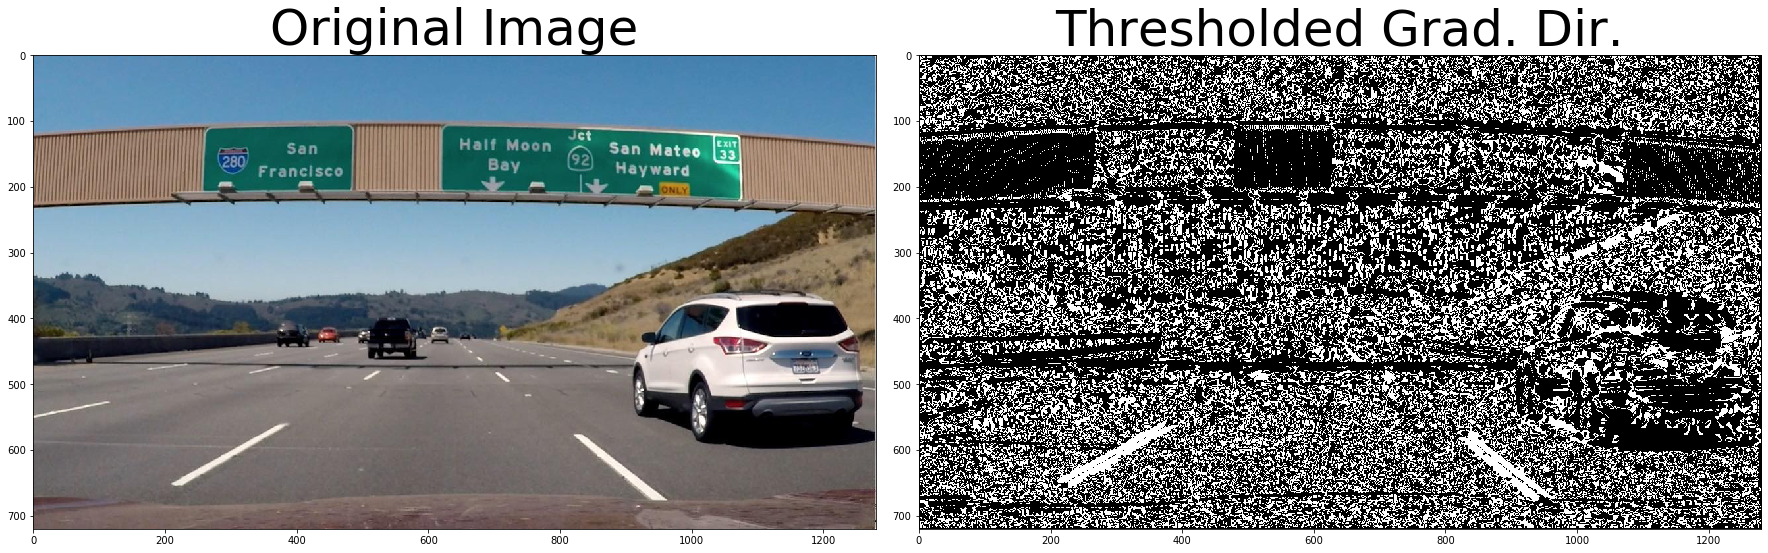

In [28]:
# Read in an image
image = mpimg.imread('LectureImages/signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    img_sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    img_sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    img_sobelx_abs =np.absolute(img_sobelx)
    img_sobely_abs =np.absolute(img_sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    img_dir = np.arctan2(img_sobely_abs, img_sobelx_abs)
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(img_dir)
    # 6) Return this mask as your binary_output image
    binary_output[(img_dir >= thresh[0]) & (img_dir <= thresh[1])] = 1
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)